<a href="https://colab.research.google.com/github/JohnCubides/ArtificialIntelligence/blob/main/Actividad_2_BusquedaSistemasBasadosReglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Importar librerias

import numpy as np #metodos numericos
import pandas as pd #Manejo datos
import matplotlib.pyplot as plt #Gráfica
import seaborn as sns #Grágica

In [3]:
#Get Data
df = pd.read_csv('https://raw.githubusercontent.com/julihdez36/Inteligencia_artificial/main/Forbes%202000%202022.csv',sep=';')

In [ ]:
# AED
df.shape

(2000, 8)

In [4]:
df.columns

Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')

In [5]:
#Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rank                               2000 non-null   int64  
 1   Company Name                       2000 non-null   object 
 2   Country                            2000 non-null   object 
 3   Sales
($millions)                  2000 non-null   object 
 4   Profits
($millions)                2000 non-null   object 
 5   Assets
($millions)                 2000 non-null   object 
 6   Market Value 
As of 05/12/22 ($m)  2000 non-null   object 
 7   Unnamed: 7                         0 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [6]:
#clear Data
df = df.drop(df.columns[7], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Rank                               2000 non-null   int64 
 1   Company Name                       2000 non-null   object
 2   Country                            2000 non-null   object
 3   Sales
($millions)                  2000 non-null   object
 4   Profits
($millions)                2000 non-null   object
 5   Assets
($millions)                 2000 non-null   object
 6   Market Value 
As of 05/12/22 ($m)  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [7]:
#Define Tittle
columnName = ['Rank', 'Name', 'Country', 'Sales', 'Profits', 'Assets', 'MarketValue']
df.columns = columnName
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         2000 non-null   int64 
 1   Name         2000 non-null   object
 2   Country      2000 non-null   object
 3   Sales        2000 non-null   object
 4   Profits      2000 non-null   object
 5   Assets       2000 non-null   object
 6   MarketValue  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [8]:
#Change DataTyping (coerción stadistica)
df.replace(to_replace=",", value='', regex=True, inplace=True )
df.replace(to_replace="\$", value='', regex=True, inplace=True )
df.iloc[:,3:] = df.iloc[:,3:].astype(float)
df.sample(5)

<ipython-input-8-dfa82c3267e3>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3:] = df.iloc[:,3:].astype(float)


,Rank,Name,Country,Sales,Profits,Assets,MarketValue
557,558,Wesfarmers,Australia,25350.0,1650.0,18340.0,40570.0
894,895,CIMB Group Holdings,Malaysia,5660.0,1040.0,149280.0,12220.0
1848,1849,Bank of Lanzhou,China,2460.0,216.0,61330.0,4760.0
804,805,SK Innovation,South Korea,40910.0,266.0,41690.0,14960.0
1285,1286,Sojitz,Japan,18130.0,658.0,21790.0,3620.0


In [10]:
#top 10
df.head(10)

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0
1,2,ICBC,China,208130.0,54030.0,5518510.0,214430.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0
4,5,China Construction Bank,China,202070.0,46890.0,4746950.0,181320.0
5,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0
6,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0
7,8,Agricultural Bank of China,China,181420.0,37380.0,4561050.0,133380.0
8,9,Bank of America,United States,96830.0,31000.0,3238220.0,303100.0
9,10,Toyota Motor,Japan,281750.0,28150.0,552460.0,237730.0


In [9]:
#Tablas Frecuencias
ni = df.Country.value_counts() #Frecuecnia absoluta
fi = df.Country.value_counts(normalize=True)*100 #frecuencia relativa
Fi = fi.cumsum()
table_frec = pd.DataFrame({'ni':ni,'fi': fi, 'Fi': Fi})
table_frec['Country'] = table_frec.index
table_frec

,ni,fi,Fi,Country
United States,590,29.50,29.50,United States
China,297,14.85,44.35,China
Japan,196,9.80,54.15,Japan
South Korea,65,3.25,57.40,South Korea
United Kingdom,64,3.20,60.60,United Kingdom
Canada,58,2.90,63.50,Canada
India,55,2.75,66.25,India
France,54,2.70,68.95,France
Hong Kong,54,2.70,71.65,Hong Kong
Germany,52,2.60,74.25,Germany


In [11]:
#top 10 paises
table_frec.head(10)

,ni,fi,Fi,Country
United States,590,29.50,29.50,United States
China,297,14.85,44.35,China
Japan,196,9.80,54.15,Japan
South Korea,65,3.25,57.40,South Korea
United Kingdom,64,3.20,60.60,United Kingdom
Canada,58,2.90,63.50,Canada
India,55,2.75,66.25,India
France,54,2.70,68.95,France
Hong Kong,54,2.70,71.65,Hong Kong
Germany,52,2.60,74.25,Germany


In [13]:
#Paises con menos empresas
table_frec.tail(10)

,ni,fi,Fi,Country
Morocco,2,0.10,99.50,Morocco
Kazakhstan,2,0.10,99.60,Kazakhstan
Cayman Islands,1,0.05,99.65,Cayman Islands
Egypt,1,0.05,99.70,Egypt
Argentina,1,0.05,99.75,Argentina
Czech Republic,1,0.05,99.80,Czech Republic
Bahrain,1,0.05,99.85,Bahrain
Uruguay,1,0.05,99.90,Uruguay
Peru,1,0.05,99.95,Peru
Nigeria,1,0.05,100.00,Nigeria


In [ ]:
#Empresas en Colombia
df[ df.Country == 'Colombia' ]

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
294,295,Ecopetrol,Colombia,23430.0,4450.0,60010.0,36070.0
975,976,Bancolombia,Colombia,6080.0,1090.0,71220.0,10890.0
986,987,Grupo Aval,Colombia,10270.0,880.0,90150.0,4780.0


In [34]:
sud = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Perú", "Uruguay", "Venezuela"]
df[df.Country.isin(sud)]
df_suda = df[df['Country'].isin(sud)] # isin
df_suda

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
64,65,Petrobras,Brazil,83890.0,19770.0,174680.0,83980.0
117,118,Vale,Brazil,54400.0,22470.0,89610.0,82030.0
137,138,Itaú Unibanco Holding,Brazil,35960.0,4960.0,372300.0,52890.0
181,182,Banco Bradesco,Brazil,28330.0,4070.0,296890.0,43160.0
267,268,Banco do Brasil,Brazil,29540.0,3400.0,362530.0,20700.0
294,295,Ecopetrol,Colombia,23430.0,4450.0,60010.0,36070.0
399,400,JBS,Brazil,64990.0,3800.0,37180.0,17480.0
773,774,Banco Btg Pactual,Brazil,2710.0,848.0,68310.0,56140.0
832,833,Quinenco,Chile,8460.0,2490.0,72470.0,4840.0
904,905,AntarChile,Chile,24900.0,1210.0,25870.0,3490.0


In [15]:
table_sud = table_frec[table_frec.index.isin(sud)]

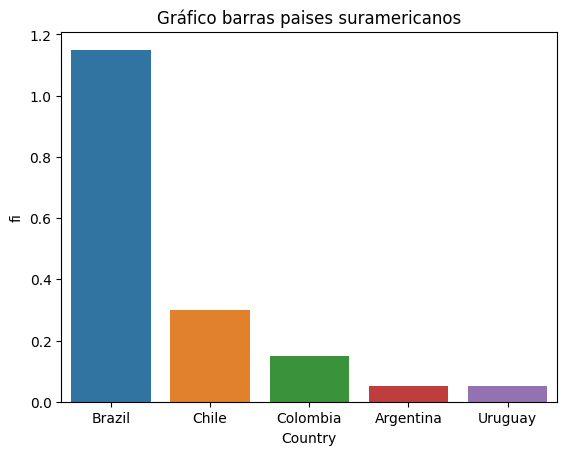

In [16]:
sns.barplot(table_sud, x='Country',y='fi')
plt.title('Gráfico barras paises suramericanos')
plt.show()

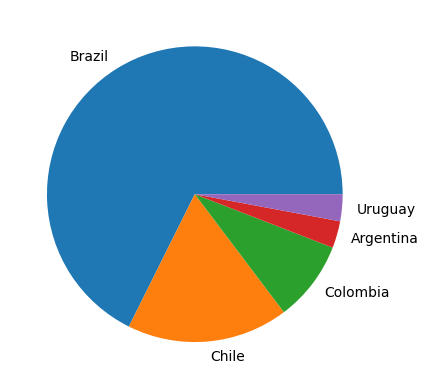

In [17]:
#Gráfico sectores
plt.pie(table_sud.fi, labels=table_sud.Country)
plt.show()

In [18]:
#Métodos numérocos
df.describe().round(2)

,Rank,Sales,Profits,Assets,MarketValue
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,23876.04,2502.12,117035.24,38242.61
std,577.49,40943.90,6159.20,363742.61,117206.80
min,1.00,0.00,-12050.00,166.00,144.00
25%,500.75,5607.50,590.00,14797.50,7325.00
50%,1000.50,12170.00,1055.00,32010.00,16625.00
75%,1500.25,23725.00,2270.00,77815.00,34710.00
max,2000.00,572750.00,105360.00,5518510.00,2640320.00


In [19]:
df.head(15)
#Escalamiento
from sklearn.preprocessing import StandardScaler
#inicializar el Escalador(Z-score)
scaler = StandardScaler()

#ajustar y transformar los datos
scaled_df = scaler.fit_transform(df_int)
scaled_df = pd.DataFrame({'Sales':scaled_df[:,0]})

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0
1,2,ICBC,China,208130.0,54030.0,5518510.0,214430.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0
4,5,China Construction Bank,China,202070.0,46890.0,4746950.0,181320.0
5,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0
6,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0
7,8,Agricultural Bank of China,China,181420.0,37380.0,4561050.0,133380.0
8,9,Bank of America,United States,96830.0,31000.0,3238220.0,303100.0
9,10,Toyota Motor,Japan,281750.0,28150.0,552460.0,237730.0


In [20]:
#Definimos número de intervalos
n = df.shape[0]
k = 1 +(10/3)*np.log10(n)
k = int(k.round(0))
k

12

In [21]:
#Creamos los intervalos
frecuencia = pd.value_counts(pd.cut(x=df.Sales,bins=k,include_lowest=True),
                             sort = False, normalize = True)
frecuencia

(-572.751, 47729.167]       0.8840
(47729.167, 95458.333]      0.0735
(95458.333, 143187.5]       0.0215
(143187.5, 190916.667]      0.0095
(190916.667, 238645.833]    0.0035
(238645.833, 286375.0]      0.0035
(286375.0, 334104.167]      0.0015
(334104.167, 381833.333]    0.0010
(381833.333, 429562.5]      0.0010
(429562.5, 477291.667]      0.0005
(477291.667, 525020.833]    0.0000
(525020.833, 572750.0]      0.0005
Name: Sales, dtype: float64

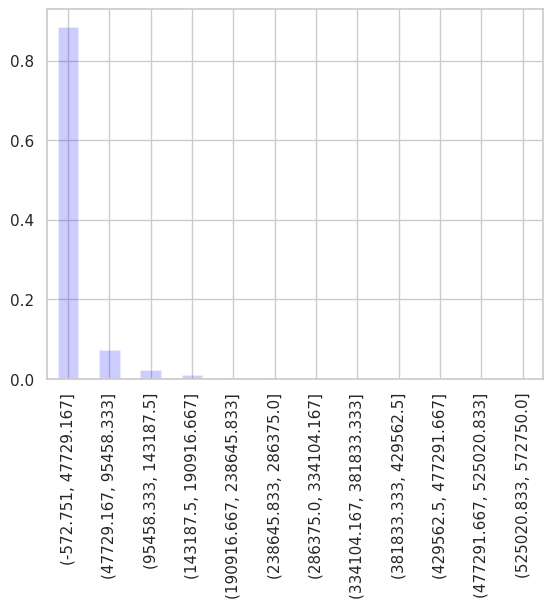

In [22]:
# Histograma de frecuencia
sns.set_theme(style="whitegrid")
frecuencia.plot(kind = 'bar', color='blue',alpha = 0.2)
plt.show()

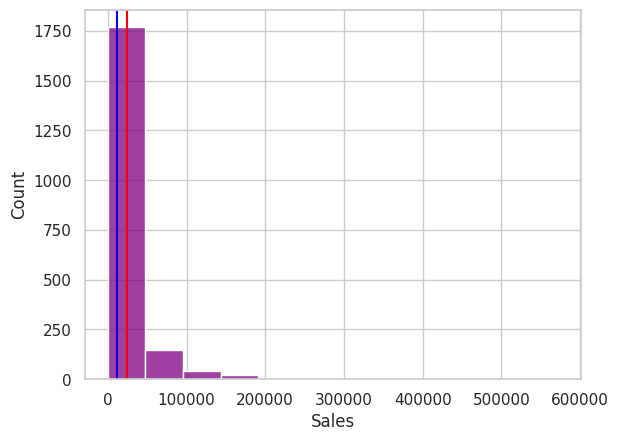

In [23]:
sns.histplot(df.Sales, color='purple',bins='sturges')
plt.axvline(df.Sales.mean(), color = 'red')
plt.axvline(df.Sales.median(), color = 'blue')
plt.show()

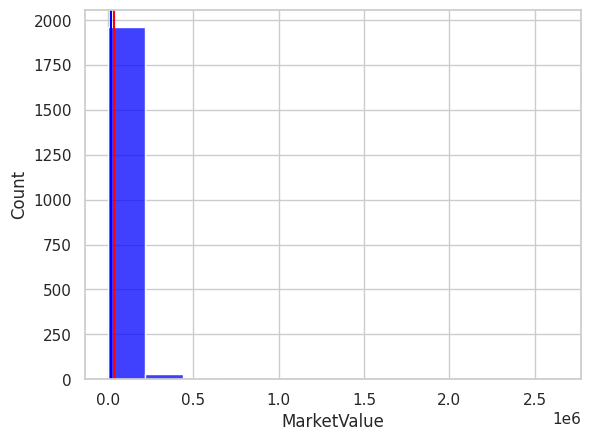

In [27]:
sns.histplot(df.MarketValue, color='blue',bins='sturges')
plt.axvline(df.MarketValue.mean(), color = 'red')
plt.axvline(df.MarketValue.median(), color = 'blue')
plt.show()

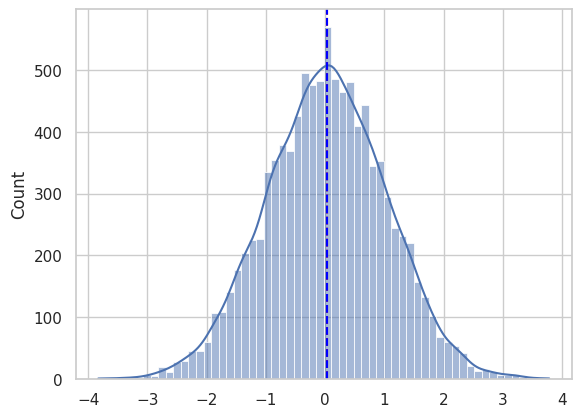

In [28]:
# Referente de una distirbución normal

eje = np.random.normal(loc = 0, scale = 1, size = 10000)
sns.histplot(eje, kde= True)
plt.axvline(eje.mean(), color = 'red',linestyle = '--')
plt.axvline(np.median(eje), color = 'blue', linestyle = '--')
plt.show()

In [29]:
df.describe().round(2)

,Rank,Sales,Profits,Assets,MarketValue
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,23876.04,2502.12,117035.24,38242.61
std,577.49,40943.90,6159.20,363742.61,117206.80
min,1.00,0.00,-12050.00,166.00,144.00
25%,500.75,5607.50,590.00,14797.50,7325.00
50%,1000.50,12170.00,1055.00,32010.00,16625.00
75%,1500.25,23725.00,2270.00,77815.00,34710.00
max,2000.00,572750.00,105360.00,5518510.00,2640320.00


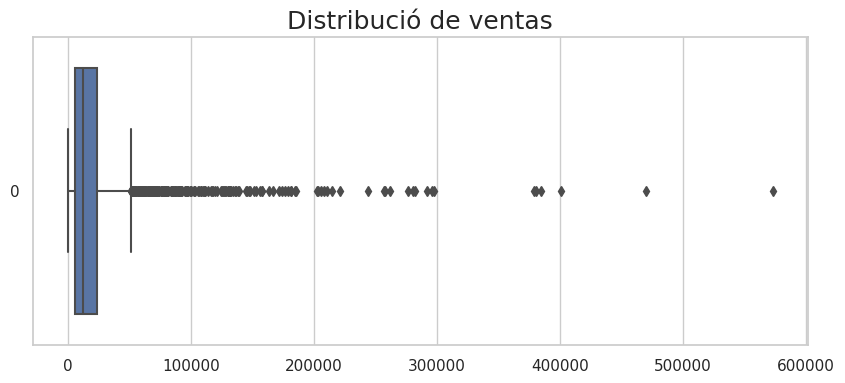

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(df.Sales, orient= 'h')
plt.title('Distribució de ventas',fontsize = 18)
plt.show()

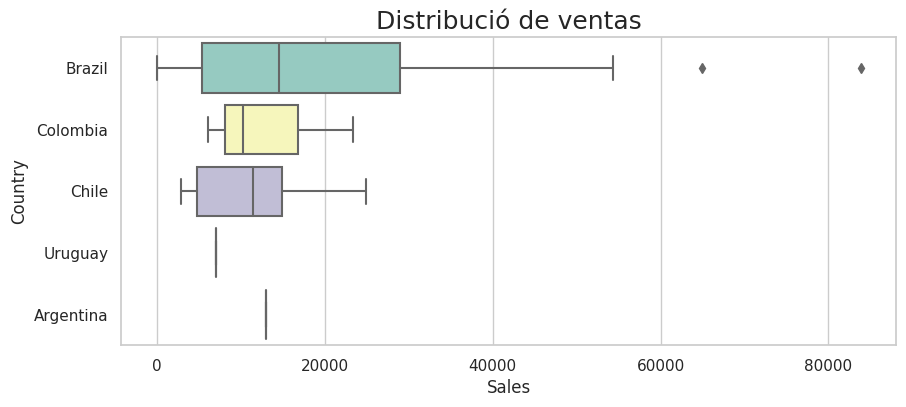

In [35]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df_suda, x = 'Sales', y='Country', orient= 'h', palette = 'Set3')
plt.title('Distribució de ventas',fontsize = 18)
plt.show()

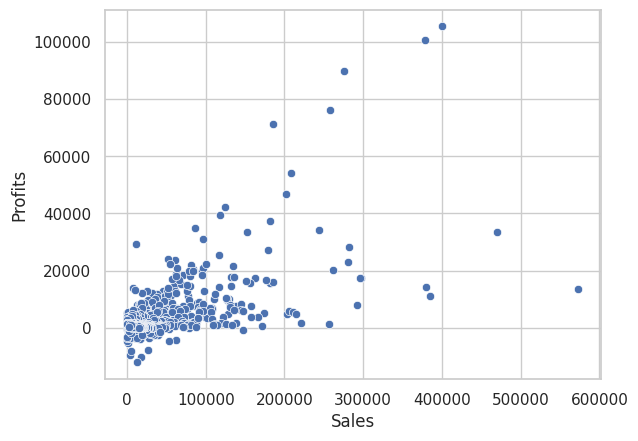

In [36]:
#ANalisis bivariado (Correlación)
sns.scatterplot(data = df, x= 'Sales', y =  'Profits')
plt.show()

In [37]:
df_int = df.iloc[:,3:]
df_int.sample(5)


,Sales,Profits,Assets,MarketValue
46,45240.0,13000.0,1377940.0,147920.0
1927,2950.0,196.0,50250.0,5490.0
524,19140.0,1290.0,37350.0,28560.0
260,78470.0,1890.0,75880.0,39190.0
362,27860.0,3720.0,57870.0,20480.0


In [38]:
df_int.corr().round(3)

,Sales,Profits,Assets,MarketValue
Sales,1.000,0.645,0.338,0.540
Profits,0.645,1.000,0.455,0.797
Assets,0.338,0.455,1.000,0.146
MarketValue,0.540,0.797,0.146,1.000


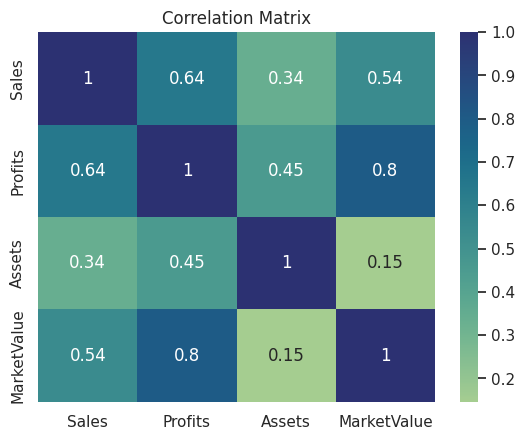

In [39]:
sns.heatmap(df_int.corr(), annot = True, cmap = "crest")
plt.title('Correlation Matrix')
plt.show()

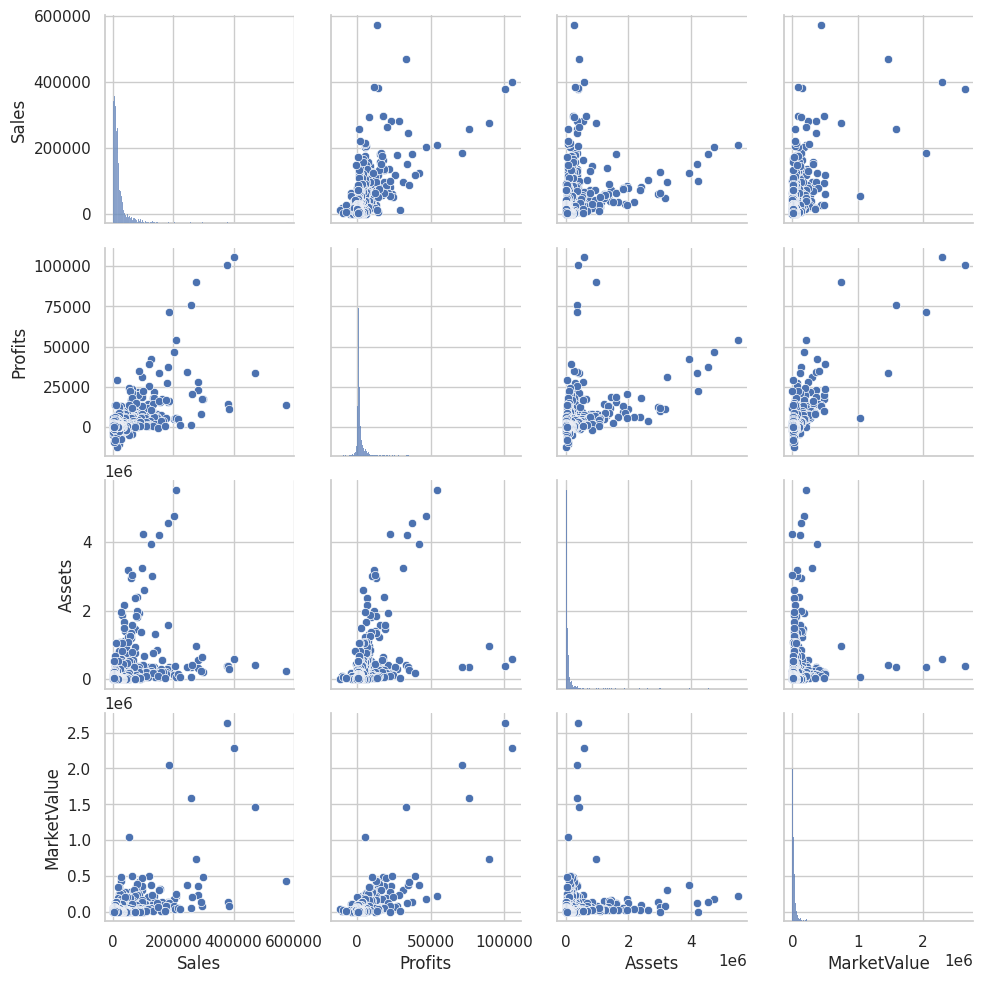

In [40]:
sns.pairplot(df_int)
plt.show()

In [41]:
df.head(15)

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0
1,2,ICBC,China,208130.0,54030.0,5518510.0,214430.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0
4,5,China Construction Bank,China,202070.0,46890.0,4746950.0,181320.0
5,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0
6,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0
7,8,Agricultural Bank of China,China,181420.0,37380.0,4561050.0,133380.0
8,9,Bank of America,United States,96830.0,31000.0,3238220.0,303100.0
9,10,Toyota Motor,Japan,281750.0,28150.0,552460.0,237730.0


In [42]:
# Escalamiento

from sklearn.preprocessing import StandardScaler

# Inicializar el escalador (Z-score)
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_df = scaler.fit_transform(df_int)

In [43]:
scaled_df[:10,]

array([[ 6.16152902, 14.17710988,  2.31470071,  6.00147168],
       [ 4.50128189,  8.36808859, 14.85343064,  1.50359418],
       [ 9.19790507, 16.70404226,  1.26220999, 19.23438857],
       [ 2.45919746,  6.43391348, 10.55310658,  2.86921482],
       [ 4.35323748,  7.20855792, 12.73172991,  1.22103138],
       [10.89430826,  5.01129602,  0.83463048, 12.20505219],
       [ 8.66826766, 15.92452584,  0.72639503, 22.2062904 ],
       [ 3.84876274,  5.66414102, 12.22052642,  0.81190844],
       [ 1.78224855,  4.62803378,  8.58289697,  2.26030948],
       [ 6.29980151,  4.16519591,  1.19736772,  1.70243783]])

In [44]:
scaled_df = pd.DataFrame({'Sales': scaled_df[:,0],
                          'Profits': scaled_df[:,1],
                          'Assets': scaled_df[:,2],
                          'Market_value': scaled_df[:,3]})
scaled_df.sample(10)


,Sales,Profits,Assets,Market_value
1915,-0.230764,-0.335699,-0.280008,-0.284036
1457,-0.526853,-0.298185,-0.253031,-0.204413
1722,-0.573563,-0.964997,-0.092438,-0.300933
1223,-0.097378,-0.659686,-0.234552,-0.256300
817,-0.289884,-0.164368,-0.262326,-0.192551
511,-0.062932,0.278982,0.442909,-0.299482
1684,-0.147459,-0.312639,-0.283747,-0.293935
1364,-0.331904,-0.290552,-0.288477,-0.207827
1001,-0.151856,-0.379385,-0.283527,0.181839
1060,-0.317490,-0.251739,-0.198281,-0.304603


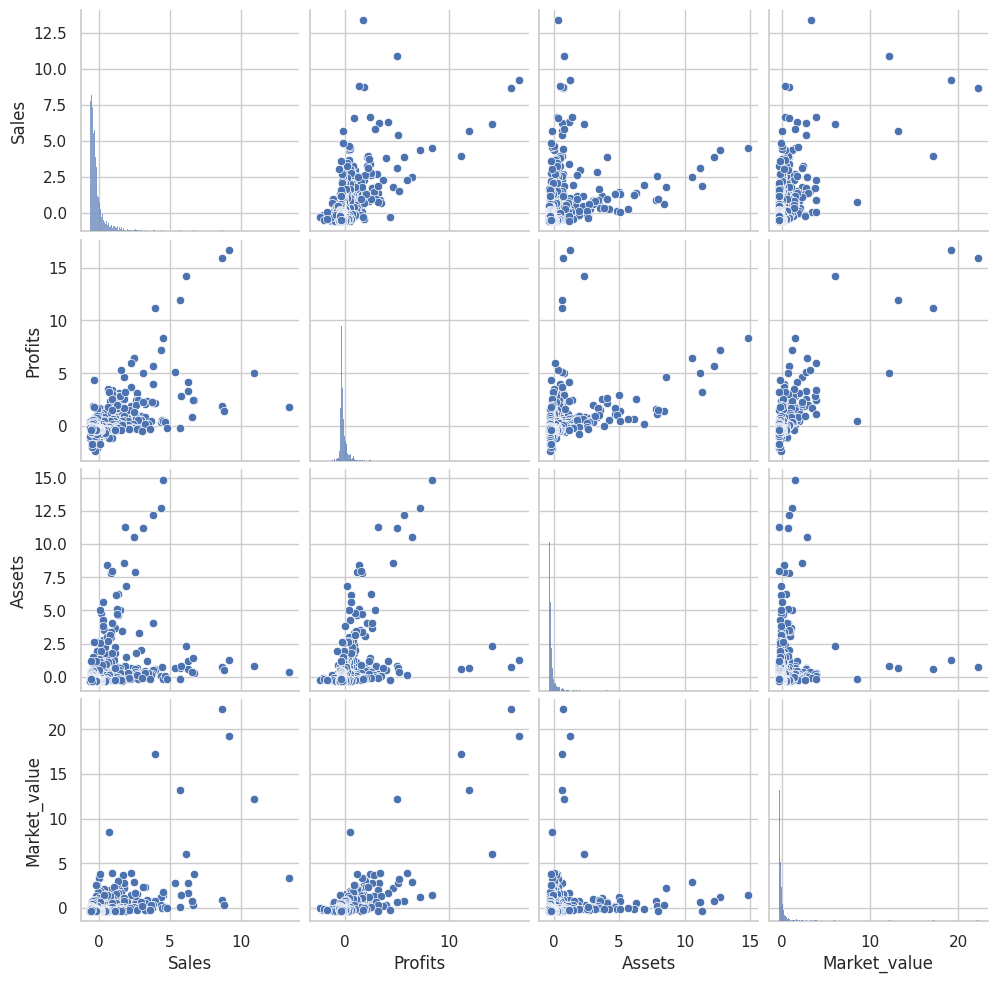

In [48]:
sns.pairplot(scaled_df)
plt.show()

In [49]:
# Kmeans model

from sklearn.cluster import KMeans

In [47]:
# Número de clusters (k) son requeridos
# Elbow method

WCSS = [] #"Within-Cluster-Sum-of-Squares"

for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init='k-means++',random_state=0) #pruebas k
    kmeans.fit(scaled_df) #entrenamiento
    WCSS.append(kmeans.inertia_) #guardamos resultados


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [50]:
print(WCSS)

[8000.000000000001, 5166.980893529254, 3405.5199590285647, 2468.1156087169643, 2074.0381499164614, 1724.2633459357303, 1509.7047200442264, 1370.1660201235534, 1205.544248319866, 1094.4420336104383]


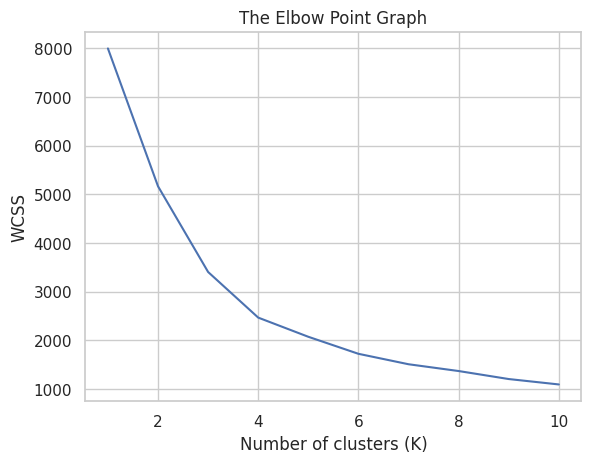

In [51]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans_model = KMeans(n_clusters= 4, init='k-means++',random_state=0)

In [53]:
# Clusterización

y = kmeans_model.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
print(len(y))
print(y)

2000
[2 3 2 ... 0 0 0]


In [55]:
scaled_df['cluster'] = y.astype(str)
scaled_df

,Sales,Profits,Assets,Market_value,cluster
0,6.161529,14.177110,2.314701,6.001472,2
1,4.501282,8.368089,14.853431,1.503594,3
2,9.197905,16.704042,1.262210,19.234389,2
3,2.459197,6.433913,10.553107,2.869215,3
4,4.353237,7.208558,12.731730,1.221031,3
...,...,...,...,...,...
1995,-0.582382,-0.177360,-0.321377,-0.316636,0
1996,-0.497293,-0.177360,-0.306132,-0.271747,0
1997,-0.199250,-0.397736,-0.288532,-0.309638,0
1998,-0.475551,-0.255149,-0.300824,-0.245121,0


In [58]:
# Coordenadas de los centroides
kmeans_model.cluster_centers_

array([[-0.20539008, -0.16743544, -0.13506708, -0.11356396],
       [ 2.49811059,  1.45238735,  0.56695674,  0.90095743],
       [ 7.42715394, 12.48545099,  1.06970892, 15.00418193],
       [ 1.67584097,  2.71059286,  7.66339664,  0.56875742]])

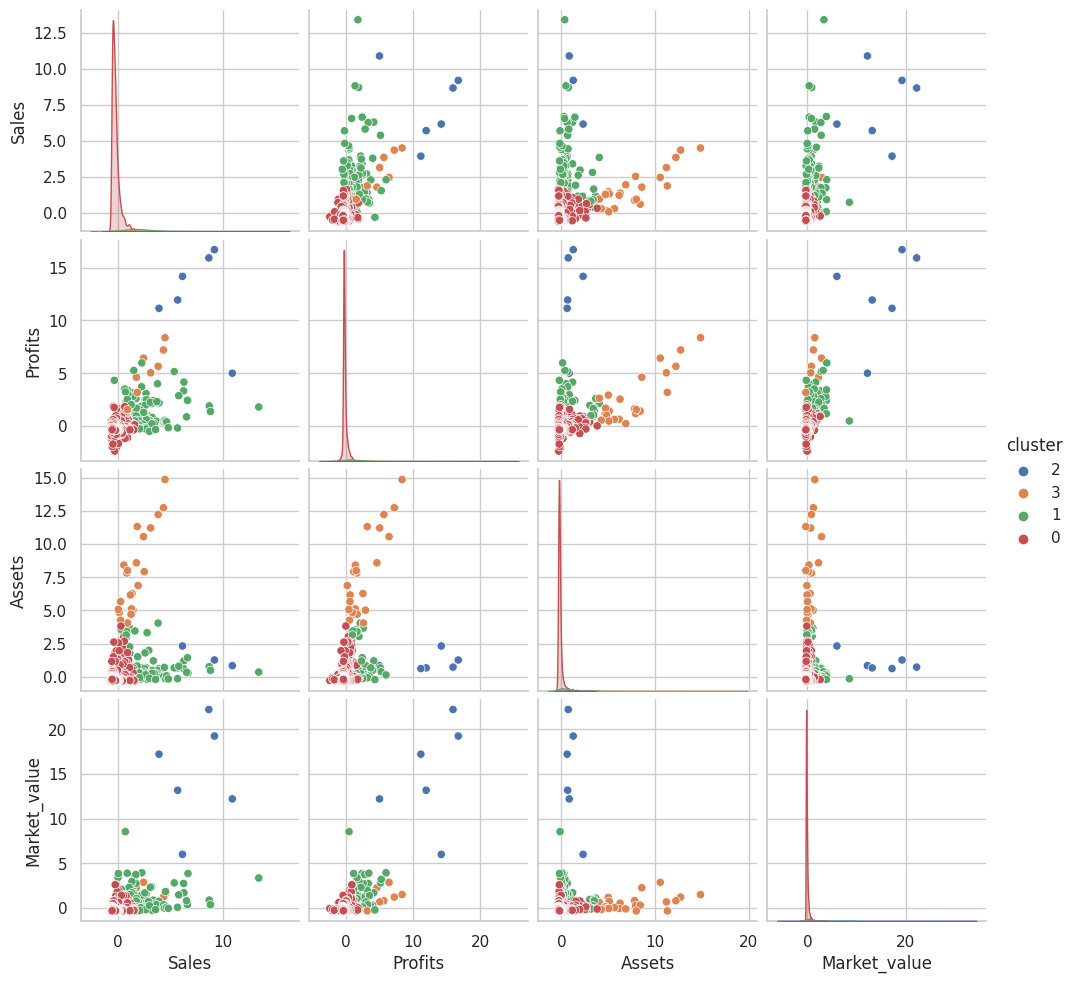

In [59]:
sns.pairplot(scaled_df, hue= 'cluster')
plt.show()

In [60]:
scaled_df_t = scaled_df
scaled_df_t['Name'] = df.Name
scaled_df_t['Country'] = df.Country
scaled_df_t = scaled_df_t[['Name','Country','Sales', 'Profits', 'Assets', 'Market_value','cluster']]
scaled_df_t.sample(5)

,Name,Country,Sales,Profits,Assets,Market_value,cluster
1490,Kerry Properties,Hong Kong,-0.532716,-0.190352,-0.251271,-0.293253,0
962,Equity Residential,United States,-0.523922,-0.190352,-0.263618,-0.033902,0
183,ING Group,Netherlands,-0.058290,0.511213,2.653019,0.006720,0
57,Taiwan Semiconductor,Taiwan,0.918412,3.431151,0.061363,3.894582,1
1061,Uni-President,Taiwan,-0.169201,-0.290715,-0.270741,-0.214654,0


In [61]:
import plotly.express as px

In [65]:
px.scatter_3d(df,x= 'Sales', y= 'Assets',
              z = 'Profits')